# Week3 授業課題 信用情報の分析

## 1.このテキストについて
### テキストの目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

### どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 2.信用情報
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)

Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

- Home Creditはどのような企業？
- このコンペティションでは何を予測する？
- それを予測することで企業が得られるメリットは何？

### 【解答】
- Home Creditはどのような企業？  
→1997年にチェコで創業した金融サービスを提供している企業。スコアが低い人々にも迅速な融資を行うことを謳っている。
  
- このコンペティションでは何を予測する？  
→過去に融資した顧客のデータセットから推定し、返済不能になりそうな顧客を予測する。
  
- それを予測することで企業が得られるメリットは何？  
→返済の遅延や貸し倒れのリスクを少なくする。

### データセットの準備
データセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。

Dataページ内の他のcsvファイルはこの課題では扱いません。

### カーネルについて
コンペティションのKernelページで公開されているカーネルを活用してください。

### ＜推奨参考カーネル＞

[Home Credit Default Risk Extensive EDA | Kaggle](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)

[HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle](https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772)

[HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle](https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp)

この他タイトルにEDAと付いているものを参考にしてください。

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

それぞれ結果に対する説明や考察も行ってください。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv("application_train.csv")

In [3]:
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

In [5]:
display(df.describe())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### 【考察】
- データは122種類の特徴量があり、307511個のデータがある。
- 目的変数は 'TARGET' のカラムで、返済が遅れたことがあるか判定結果が入っている

In [6]:
threshold = 0 # この値以下の欠損率の特徴量は表示しない
n_samples = len(df)
missing_rate = df.isnull().sum() / n_samples * 100
print("欠損率が{}%より高い特徴量の一覧\n{}".format(threshold, missing_rate[missing_rate>threshold]))

欠損率が0%より高い特徴量の一覧
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE  

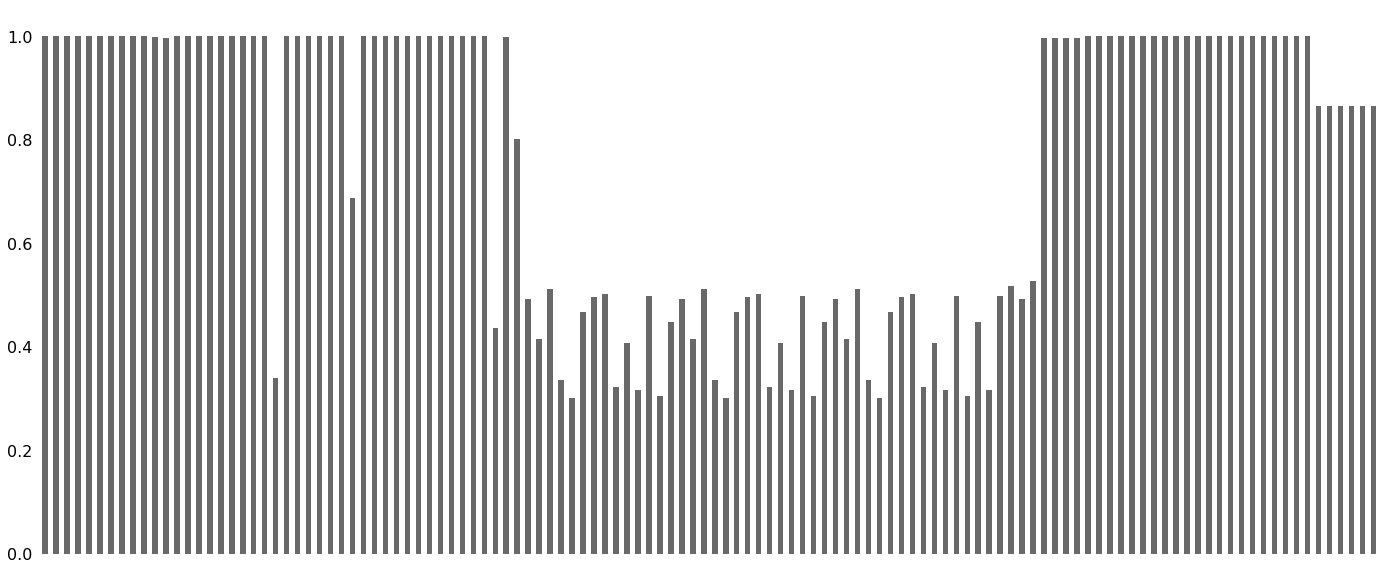

In [7]:
display(msno.bar(df))

### 【考察】
- 欠損地値がある特徴量も多く、半分くらい欠損値がある特徴量も半数くらいある

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

### 【課題・疑問】
- 目的変数である'TARGET'の判定の比率はどうなっているのか
- 男女比はどれくらいか？融資を受ける人は男性が多いイメージ
- 顧客の住んでいるエリアが 'REGION_RATING_CLIENT'、'REGION_RATING_CLIENT_W_CITY'の項目で分けられているがこの比率はどれくらいか

＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿
### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

#### 目的変数である'TARGET'の判定の比率はどうなっているのか

0    282686
1     24825
Name: TARGET, dtype: int64

TARGET：0 のデータ数は TARGET：1 のデータ数の 約11.39倍ある


C:\Anaconda3\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


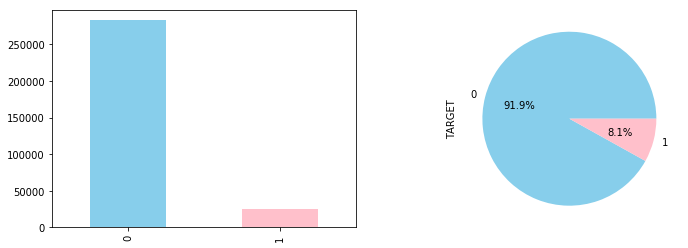

In [27]:
y = df.loc[:, 'TARGET']
y_unique_list = y.unique() # ユニーク値を調べる

y_count = y.value_counts() # それぞれのユニーク値の数をカウントする
display(y.value_counts()) 

print("TARGET：0 のデータ数は TARGET：1 のデータ数の 約{:.2f}倍ある".format(y_count[0] / y_count[1] ))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

y_count.plot(kind="bar", x='label', colors=['skyblue', 'pink']) # 棒グラフで可視化する
plt.subplot(1, 2, 2)
y_count.plot.pie(autopct="%1.1f%%", colors=['skyblue', 'pink'])
plt.show()

### 【考察】
データセットのうち目的変数である TARGET が0(問題がない顧客の割合が約92%で、返済が遅れるなど問題があった顧客は約8%である

#### 男女比はどれくらいか

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

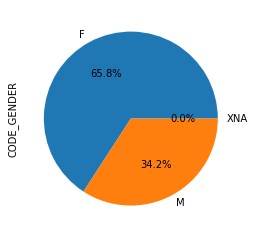

In [28]:
gender_df = df.loc[:, ['CODE_GENDER', 'TARGET']]
gender_count = gender_df.loc[:, 'CODE_GENDER'].value_counts()
display(gender_count)
gender_count.plot.pie(autopct="%1.1f%%")

#### 男女の差によって目的変数の差はあるか

,Male,Female
TARGET:0,94404,188278
TARGET:1,10655,14170


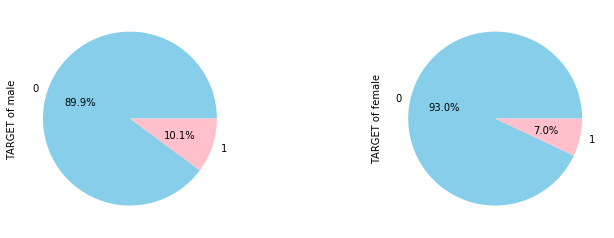

In [29]:
gender_df = df.loc[:, ['CODE_GENDER', 'TARGET']]

gender_m_count =  gender_df.query('CODE_GENDER=="M"').loc[:, 'TARGET'].value_counts() # 男性の目的変数をカウント
gender_f_count =  gender_df.query('CODE_GENDER=="F"').loc[:, 'TARGET'].value_counts() # 女性の目的変数をカウント

gender_matrix = pd.concat([gender_m_count, gender_f_count], axis=1) # 男女の目的変数のカウント数を結合
gender_matrix.index = ['TARGET:0', 'TARGET:1'] # インデックス名を変更
gender_matrix.columns = ['Male', 'Female'] # カラム名を変更
display(gender_matrix) # 男女別の目的変数の集計表を表示

# 男女別の目的変数の比率を円グラフで描画
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
gender_m_count.plot.pie(autopct="%1.1f%%", label='TARGET of male', colors=['skyblue', 'pink'])
plt.subplot(1, 2, 2)
gender_f_count.plot.pie(autopct="%1.1f%%", label='TARGET of female', colors=['skyblue', 'pink'])
plt.show()

### 【考察】
- データの男女比は女性が男性の2倍となっていた。
- 全体では問題のある顧客は約8%だったのに対し、男性だけでは約10%と全体平均より多い。逆に女性だけでは7%なので全体平均よりやや少なかった。

#### 顧客の住んでいるエリアが 'REGION_RATING_CLIENT'、'REGION_RATING_CLIENT_W_CITY'の項目で分けられているがこの比率はどれくらいか

,1,2,3
REGION_RATING_CLIENT,32197,226984,48330
REGION_RATING_CLIENT_W_CITY,34167,229484,43860


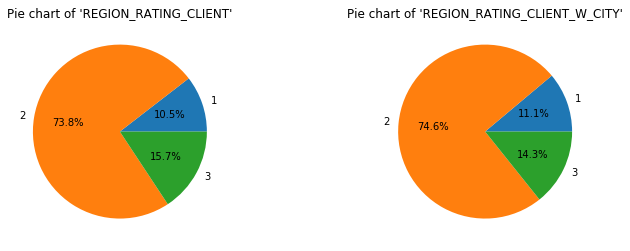

In [30]:
region_df = df.loc[:, ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'TARGET']]

rating_label = [1, 2, 3]
region_rating_countlist = []


for i in range(len(region_df.loc[:, 'REGION_RATING_CLIENT'].unique())):
    region_rating_countlist.append(region_df['REGION_RATING_CLIENT'].value_counts()[i+1])


region_rating__wcity_countlist = []
for i in range(len(region_df.loc[:, 'REGION_RATING_CLIENT_W_CITY'].unique())):
    region_rating__wcity_countlist.append(region_df['REGION_RATING_CLIENT_W_CITY'].value_counts()[i+1])


display(pd.DataFrame([region_rating_countlist, region_rating__wcity_countlist],
                     columns=rating_label, index=['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Pie chart of 'REGION_RATING_CLIENT'")
plt.pie(region_rating_countlist, labels=rating_label, autopct="%1.1f%%")
plt.subplot(1, 2, 2)
plt.title("Pie chart of 'REGION_RATING_CLIENT_W_CITY'")
plt.pie(region_rating__wcity_countlist, labels=rating_label, autopct="%1.1f%%")
plt.show()